In [1]:
import pandas as pd
import numpy as np
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

In [2]:
json_file_path = '../dataset/train.json'

In [3]:
with open(json_file_path, 'r') as j :
    json_data = json.load(j)

In [4]:
print(json_data['categories'])

[{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'}, {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'}, {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'}, {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'}, {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'}, {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'}, {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'}, {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'}, {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'}, {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]


In [5]:
df_annotations = json_normalize(json_data['annotations'])

In [6]:
df_annotations

image_id  category_id       area                          bbox  \
0             0            0  257301.66  [197.6, 193.7, 547.8, 469.7]   
1             1            3   10402.56     [0.0, 407.4, 57.6, 180.6]   
2             1            7   26259.36    [0.0, 455.6, 144.6, 181.6]   
3             1            4   69096.17  [722.3, 313.4, 274.3, 251.9]   
4             1            5   24164.58  [353.2, 671.0, 233.7, 103.4]   
...         ...          ...        ...                           ...   
23139      4882            5  768591.81    [0.0, 116.2, 944.1, 814.1]   
23140      4882            7   57309.72  [302.1, 439.3, 265.2, 216.1]   
23141      4882            0    1772.74    [511.3, 451.1, 58.7, 30.2]   
23142      4882            1   53008.67  [255.0, 421.4, 271.7, 195.1]   
23143      4882            1  149633.22  [145.4, 295.4, 420.2, 356.1]   

       iscrowd     id  
0            0      0  
1            0      1  
2            0      2  
3            0      3  
4            0      4  
...        ...    ...  
23139        0  23139  
23140        0  23140  
23141        0  23141  
23142        0  23142  
23143        0  23143  

[23144 rows x 6 columns]

In [55]:
df_annotations[df_annotations['area'] < 100]

image_id  category_id   area                       bbox  iscrowd  \
5159       1063            0   0.56   [647.8, 460.2, 0.7, 0.8]        0   
6539       1377            1   3.12   [719.8, 604.7, 1.3, 2.4]        0   
17594      3712            2  66.25  [883.8, 638.5, 12.5, 5.3]        0   

          id  bbox_center_x  bbox_center_y  
5159    5159         648.15         460.60  
6539    6539         720.45         605.90  
17594  17594         890.05         641.15

In [7]:
bbox_in_image = df_annotations['image_id'].value_counts()
bbox_in_image = pd.DataFrame(bbox_in_image)
bbox_in_image.columns = ['N of BBOX']
bbox_in_image.index = range(len(bbox_in_image))

In [8]:
bbox_in_image.describe()

N of BBOX
count  4883.000000
mean      4.739709
std       6.355155
min       1.000000
25%       1.000000
50%       2.000000
75%       6.000000
max      71.000000

In [9]:
bboxes_in_images = bbox_in_image['N of BBOX'].value_counts()
bboxes_in_images = pd.DataFrame(bboxes_in_images)
bboxes_in_images.columns = ['images']

<AxesSubplot:title={'center':'bbox per image'}, ylabel='N of Bboxes'>

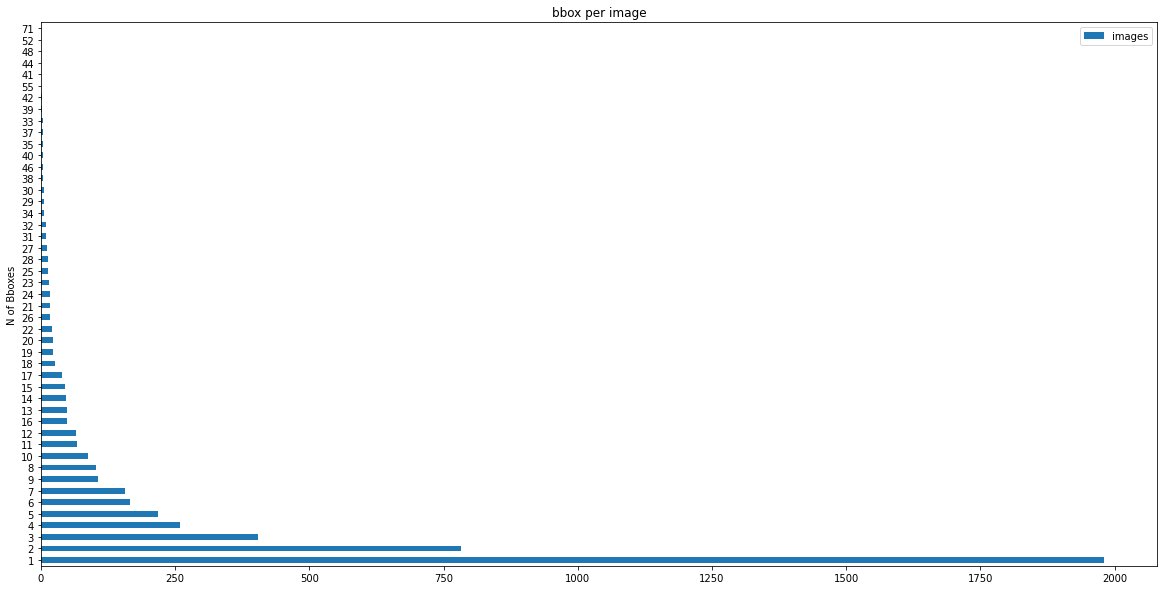

In [10]:
bboxes_in_images.rename_axis('N of Bboxes').plot.barh(figsize = (20, 10), title = 'bbox per image')

In [11]:
df_annotations.describe()

image_id   category_id          area  iscrowd            id
count  23144.000000  23144.000000  2.314400e+04  23144.0  23144.000000
mean    2439.377333      3.409307  9.286396e+04      0.0  11571.500000
std     1410.659303      2.834300  1.359791e+05      0.0   6681.241651
min        0.000000      0.000000  5.600000e-01      0.0      0.000000
25%     1206.000000      1.000000  9.997670e+03      0.0   5785.750000
50%     2453.500000      3.000000  3.893847e+04      0.0  11571.500000
75%     3678.000000      7.000000  1.191225e+05      0.0  17357.250000
max     4882.000000      9.000000  1.048371e+06      0.0  23143.000000

<AxesSubplot:xlabel='area', ylabel='category_id'>

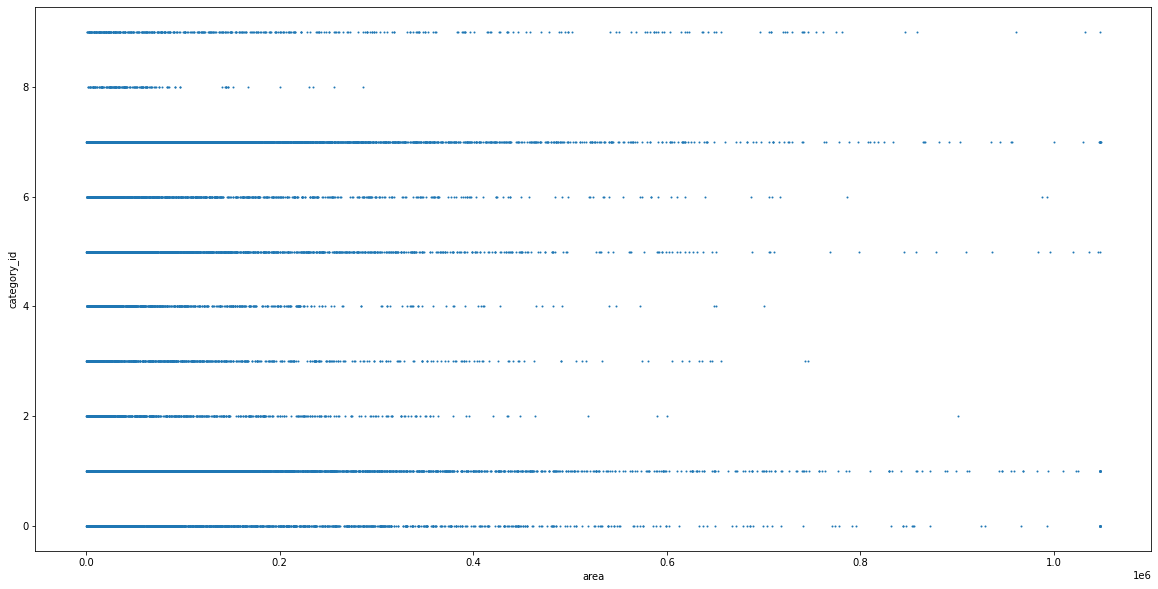

In [12]:
df_category_with_area = df_annotations[['category_id','area']]
df_category_with_area.plot.scatter(x = 'area', y = 'category_id', figsize = (20, 10), s = 1)

<AxesSubplot:>

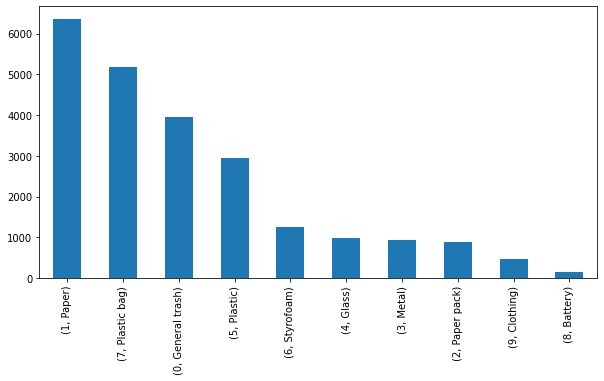

In [13]:
q_category = df_annotations['category_id'].value_counts()
array = [(i['id'], i['name']) for i in json_data['categories']]
array = np.array(array)
q_category.index = array[q_category.index]
q_category.plot.bar(figsize = (10, 5),  x = array)

In [14]:
bbox_center = np.array([np.array(i[0:2]) + np.array(i[2:]) / 2 for i in df_annotations['bbox']])
bbox_center = pd.DataFrame(bbox_center)
bbox_center.columns = ['bbox_center_x', 'bbox_center_y']
df_annotations = pd.concat([df_annotations, bbox_center], axis = 1)
df_annotations

image_id  category_id       area                          bbox  \
0             0            0  257301.66  [197.6, 193.7, 547.8, 469.7]   
1             1            3   10402.56     [0.0, 407.4, 57.6, 180.6]   
2             1            7   26259.36    [0.0, 455.6, 144.6, 181.6]   
3             1            4   69096.17  [722.3, 313.4, 274.3, 251.9]   
4             1            5   24164.58  [353.2, 671.0, 233.7, 103.4]   
...         ...          ...        ...                           ...   
23139      4882            5  768591.81    [0.0, 116.2, 944.1, 814.1]   
23140      4882            7   57309.72  [302.1, 439.3, 265.2, 216.1]   
23141      4882            0    1772.74    [511.3, 451.1, 58.7, 30.2]   
23142      4882            1   53008.67  [255.0, 421.4, 271.7, 195.1]   
23143      4882            1  149633.22  [145.4, 295.4, 420.2, 356.1]   

       iscrowd     id  bbox_center_x  bbox_center_y  
0            0      0         471.50         428.55  
1            0      1          28.80         497.70  
2            0      2          72.30         546.40  
3            0      3         859.45         439.35  
4            0      4         470.05         722.70  
...        ...    ...            ...            ...  
23139        0  23139         472.05         523.25  
23140        0  23140         434.70         547.35  
23141        0  23141         540.65         466.20  
23142        0  23142         390.85         518.95  
23143        0  23143         355.50         473.45  

[23144 rows x 8 columns]

In [15]:
df_bbox_center = df_annotations[['category_id', 'bbox_center_x', 'bbox_center_y']]
df_bbox_center

category_id  bbox_center_x  bbox_center_y
0                0         471.50         428.55
1                3          28.80         497.70
2                7          72.30         546.40
3                4         859.45         439.35
4                5         470.05         722.70
...            ...            ...            ...
23139            5         472.05         523.25
23140            7         434.70         547.35
23141            0         540.65         466.20
23142            1         390.85         518.95
23143            1         355.50         473.45

[23144 rows x 3 columns]

In [16]:
df_bbox_center[df_bbox_center['category_id'] == 1]

category_id  bbox_center_x  bbox_center_y
12               1         650.10         506.90
13               1         941.50         512.15
14               1         427.00         475.65
15               1         498.50         476.25
16               1         621.05         595.65
...            ...            ...            ...
23114            1         358.50         297.50
23115            1         376.75         678.15
23137            1         361.30         513.80
23142            1         390.85         518.95
23143            1         355.50         473.45

[6352 rows x 3 columns]

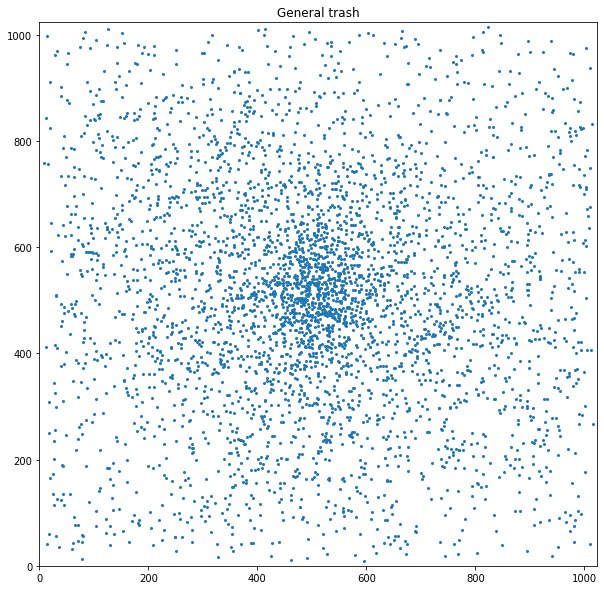

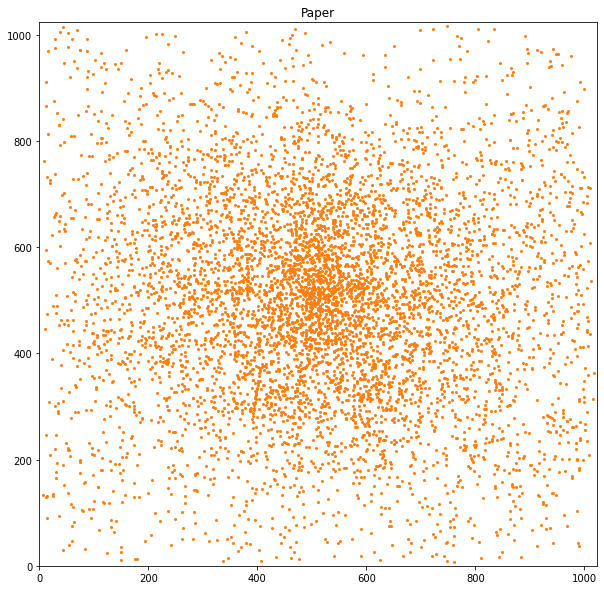

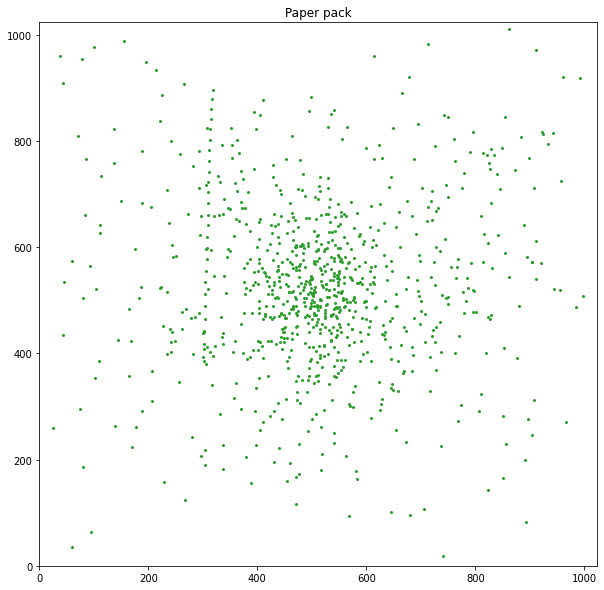

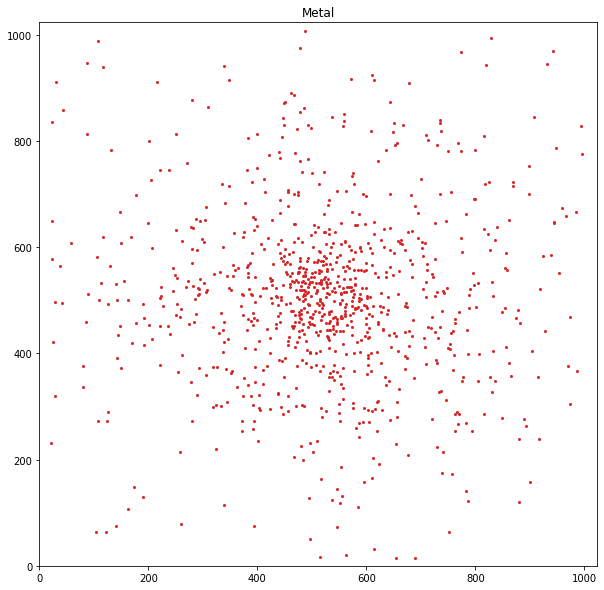

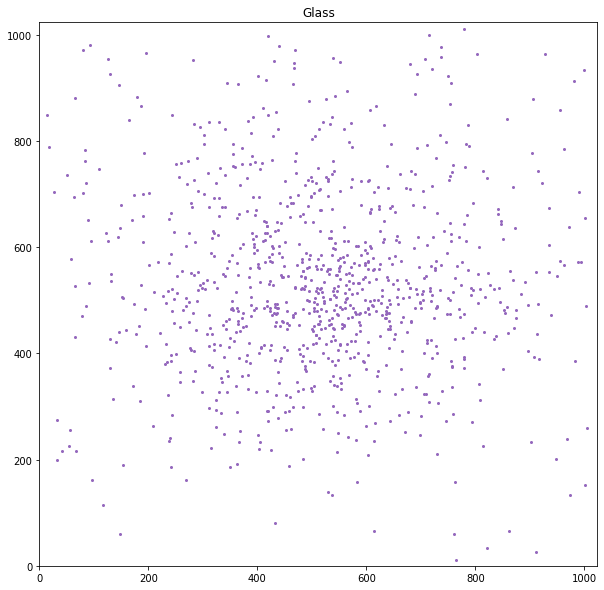

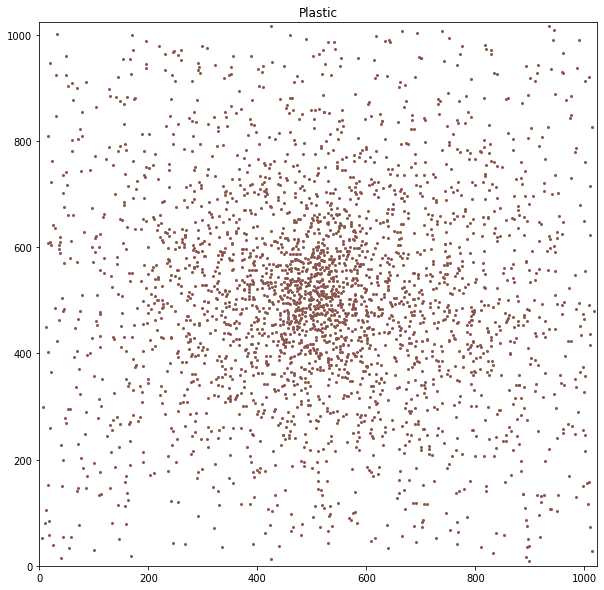

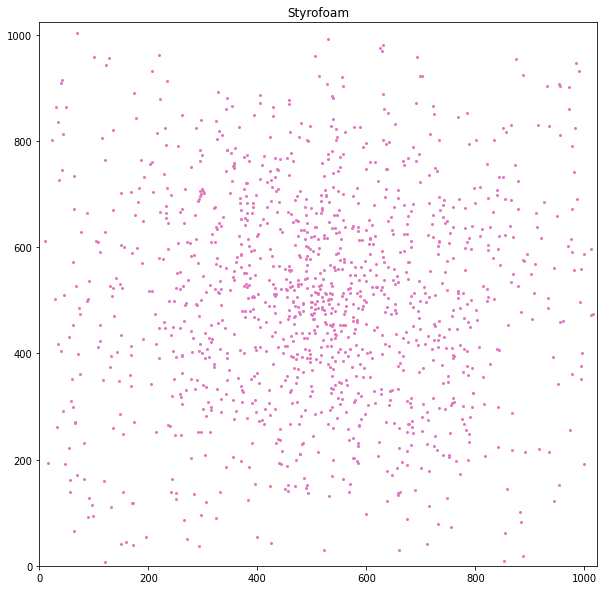

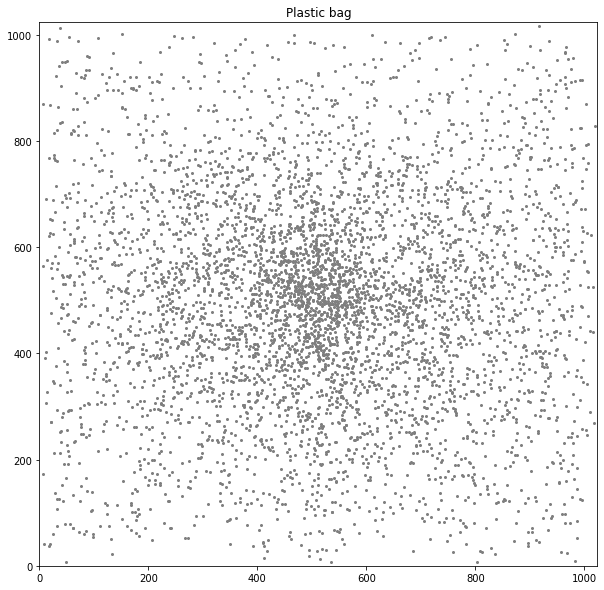

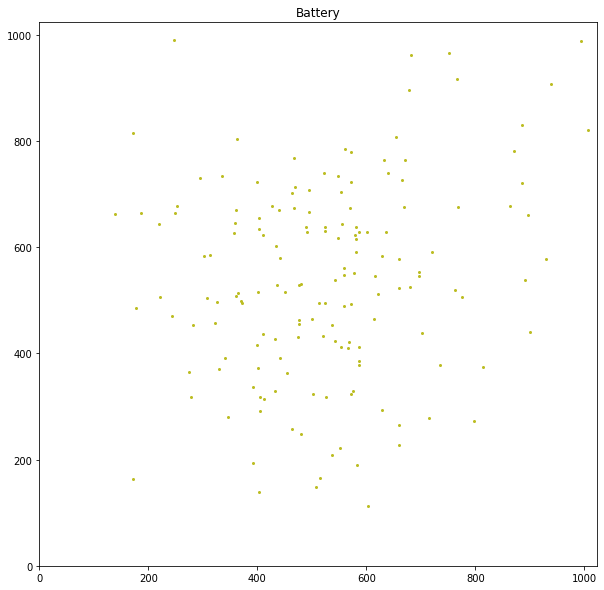

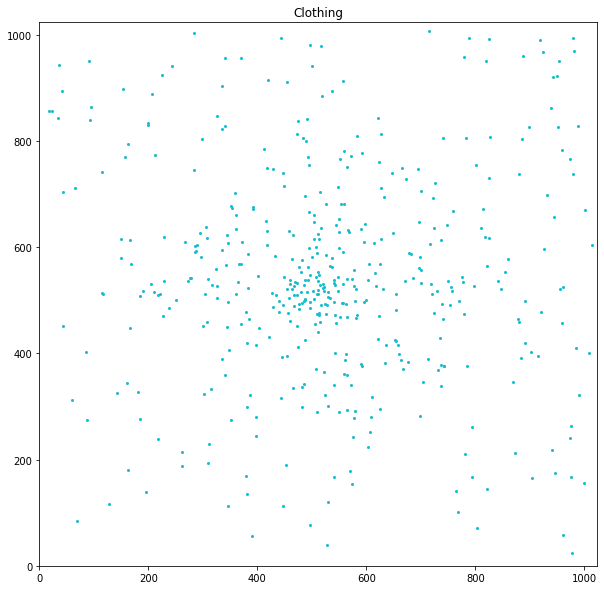

In [17]:

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for i in range(10) :
    plt.figure(figsize = (10, 10))
    plt.xlim(0, 1024)
    plt.ylim(0, 1024)
    temp = df_bbox_center[df_bbox_center['category_id'] == i]
    plt.scatter(temp['bbox_center_x'], temp['bbox_center_y'], color = color_list[i], s = 4)
    plt.title(array[i][1])
    plt.show()


In [18]:
df_bbox_per_image = df_annotations[['id', 'image_id', 'category_id']]

In [19]:
df_bbox_per_image

id  image_id  category_id
0          0         0            0
1          1         1            3
2          2         1            7
3          3         1            4
4          4         1            5
...      ...       ...          ...
23139  23139      4882            5
23140  23140      4882            7
23141  23141      4882            0
23142  23142      4882            1
23143  23143      4882            1

[23144 rows x 3 columns]

Split Dataset
=============


In [20]:
from sklearn.model_selection import KFold

In [21]:
kf = KFold(n_splits = 4, shuffle = True, random_state = 0)

In [22]:
k_fold_dataset = df_annotations.set_index(keys = ['image_id'], drop = True)

In [56]:
k_fold_dataset.describe()

category_id          area  iscrowd            id  bbox_center_x  \
count  23144.000000  2.314400e+04  23144.0  23144.000000   23144.000000   
mean       3.409307  9.286396e+04      0.0  11571.500000     514.945239   
std        2.834300  1.359791e+05      0.0   6681.241651     220.762289   
min        0.000000  5.600000e-01      0.0      0.000000       5.100000   
25%        1.000000  9.997670e+03      0.0   5785.750000     371.387500   
50%        3.000000  3.893847e+04      0.0  11571.500000     511.900000   
75%        7.000000  1.191225e+05      0.0  17357.250000     659.262500   
max        9.000000  1.048371e+06      0.0  23143.000000    1019.650000   

       bbox_center_y  
count   23144.000000  
mean      508.350767  
std       197.824019  
min         6.350000  
25%       385.037500  
50%       510.200000  
75%       632.712500  
max      1017.600000

In [42]:
pd.DataFrame(json_data['images']).iloc[list(train_images)]

width  height       file_name  license flickr_url coco_url  \
0      1024    1024  train/0000.jpg        0       None     None   
2      1024    1024  train/0002.jpg        0       None     None   
3      1024    1024  train/0003.jpg        0       None     None   
4      1024    1024  train/0004.jpg        0       None     None   
5      1024    1024  train/0005.jpg        0       None     None   
...     ...     ...             ...      ...        ...      ...   
4878   1024    1024  train/4878.jpg        0       None     None   
4879   1024    1024  train/4879.jpg        0       None     None   
4880   1024    1024  train/4880.jpg        0       None     None   
4881   1024    1024  train/4881.jpg        0       None     None   
4882   1024    1024  train/4882.jpg        0       None     None   

            date_captured    id  
0     2020-12-26 14:44:23     0  
2     2020-12-27 17:55:52     2  
3     2021-03-31 12:10:36     3  
4     2021-01-01 18:52:38     4  
5     2021-01-02 16:48:22     5  
...                   ...   ...  
4878  2021-01-04 14:36:54  4878  
4879  2021-04-27 13:46:18  4879  
4880  2020-12-24 11:25:46  4880  
4881  2021-01-05 11:01:18  4881  
4882  2020-12-23 16:20:30  4882  

[3662 rows x 8 columns]

In [48]:
i = 0
for train_idx, valid_idx in kf.split(range(4883)) :
    # train_name = 'k_fold_train' + str(i) + '.json'
    train_image_name = 'k_fold_train_image_' + str(i) + '.json'
    # train_data = k_fold_dataset.loc[train_idx]
    train_images = set(train_idx)
    df_train_images = pd.DataFrame(json_data['images']).iloc[list(train_images)]
    df_train_images.to_json(train_image_name, orient = 'index')
    # train_data['image_id'] = train_data.index
    # train_data = train_data.reset_index(drop = True)
    # train_data.to_json(train_name, orient = 'index')
    # valid_name = 'k_fold_valid' + str(i) + '.json'
    valid_image_name = 'k_fold_valid_image_' + str(i) + '.json'
    # valid_data = k_fold_dataset.loc[valid_idx]
    valid_images = set(valid_idx)
    df_train_images = pd.DataFrame(json_data['images']).iloc[list(valid_images)]
    df_train_images.to_json(valid_image_name, orient = 'index')
    # valid_data['image_id'] = valid_data.index
    # valid_data = valid_data.reset_index(drop = True)
    # valid_data.to_json(valid_name, orient = 'index')
    i += 1
    # print(train_data)
    # print(valid_data)

In [ ]:
valid_data